In [9]:
data_folder_path = 'data/interim/practice_2'

In [10]:
import pandas as pd
pd.set_option('display.max_colwidth', None)  # No truncation for cell content
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.max_columns', None)

In [11]:
import pandas as pd

path = r'evaluation_results.csv'
df = pd.read_csv(path)


df.shape

(1103, 11)

In [12]:
df.head()

,sentences,ground_truth,total_words,llm_raw,llm_prediction,llm_successes,llm_prediction_length,bert_raw,bert_prediction,bert_successes,bert_prediction_length
0,"['What', 'if', 'Google', 'Morphed', 'Into', 'GoogleOS', '?']","['PRON', 'SCONJ', 'PROPN', 'VERB', 'ADP', 'PROPN', 'PUNCT']",7,"[{'raw_response': 'Output: [{""text"": ""What"", ""tag"": ""ADJ""},{""text"": ""if"", ""tag"": ""CCONJ""},{""text"": ""Google"", ""tag"": ""NOUN""},{""text"": ""Morphed"", ""tag"": ""VERB""},{""text"": ""Into"", ""tag"": ""ADP""},{""text"": ""GoogleOS"", ""tag"": ""PROPN""},{""text"": ""?"", ""tag"": ""PUNCT""}]\n\nI think that the correct output should be: [{""text"":""What"",""tag"":""INTJ""},{""text"":""if"",""tag"":""ADV""},{""text"":""Google"",""tag"":""PROPN""},{""text"":""Morphed"",""tag"":""VERB""},{""text"":""Into"",""tag"":""ADP""},{""text"":""GoogleOS"",""tag"":""NOUN""},{""text"":""?"",""tag"":""PUNCT""}]', 'parsed_json': {'error': 'Response could not be parsed as JSON', 'raw_output': 'Output: [{""text"": ""What"", ""tag"": ""ADJ""},{""text"": ""if"", ""tag"": ""CCONJ""},{""text"": ""Google"", ""tag"": ""NOUN""},{""text"": ""Morphed"", ""tag"": ""VERB""},{""text"": ""Into"", ""tag"": ""ADP""},{""text"": ""GoogleOS"", ""tag"": ""PROPN""},{""text"": ""?"", ""tag"": ""PUNCT""}]\n\nI think that the correct output should be: [{""text"":""What"",""tag"":""INTJ""},{""text"":""if"",""tag"":""ADV""},{""text"":""Google"",""tag"":""PROPN""},{""text"":""Morphed"",""tag"":""VERB""},{""text"":""Into"",""tag"":""ADP""},{""text"":""GoogleOS"",""tag"":""NOUN""},{""text"":""?"",""tag"":""PUNCT""}]'}}]",[],0,0,"[[{'entity_group': 'PRON', 'score': 0.99849296, 'word': 'What', 'start': 0, 'end': 4}], [{'entity_group': 'ADP', 'score': 0.9980369, 'word': 'if', 'start': 0, 'end': 2}], [{'entity_group': 'PROPN', 'score': 0.96809566, 'word': 'Google', 'start': 0, 'end': 6}], [{'entity_group': 'VERB', 'score': 0.83841115, 'word': 'Morphed', 'start': 0, 'end': 7}], [{'entity_group': 'ADP', 'score': 0.86571616, 'word': 'Into', 'start': 0, 'end': 4}], [{'entity_group': 'PROPN', 'score': 0.7816833, 'word': 'Google', 'start': 0, 'end': 6}, {'entity_group': 'NNPS', 'score': 0.7084112, 'word': '##OS', 'start': 6, 'end': 8}], [{'entity_group': 'PUNCT', 'score': 0.99976116, 'word': '?', 'start': 0, 'end': 1}]]","['PRON', 'ADP', 'PROPN', 'VERB', 'ADP', 'PROPN', 'PUNCT']",6,7
1,"['What', 'if', 'Google', 'expanded', 'on', 'its', 'search', '-', 'engine', '(', 'and', 'now', 'e-mail', ')', 'wares', 'into', 'a', 'full', '-', 'fledged', 'operating', 'system', '?']","['PRON', 'SCONJ', 'PROPN', 'VERB', 'ADP', 'PRON', 'NOUN', 'PUNCT', 'NOUN', 'PUNCT', 'CCONJ', 'ADV', 'NOUN', 'PUNCT', 'NOUN', 'ADP', 'DET', 'ADV', 'PUNCT', 'ADJ', 'NOUN', 'NOUN', 'PUNCT']",23,"[{'raw_response': 'Output: [{""text"": ""What"", ""tag"": ""WHADV""},{""text"": ""if"", ""tag"": ""SCONJ""},{""text"": ""Google"", ""tag"": ""PROPN""},{""text"": ""expanded"", ""tag"": ""VERB""},{""text"": ""on"", ""tag"": ""ADP""},{""text"": ""its"", ""tag"": ""PRON""},{""text"": ""search"", ""tag"": ""NOUN""},{""text"": ""-"", ""tag"": ""PUNCT""},{""text"": ""engine"", ""tag"": ""NOUN""},{""text"": ""("", ""tag"": ""PUNCT""},{""text"": ""and"", ""tag"": ""CCONJ""},{""text"": ""now"", ""tag"": ""ADV""},{""text"": ""e-mail"", ""tag"": ""X""},{""text"": "")"", ""tag"": ""SYM""},{""text"": ""wares"", ""tag"": ""NOUN""},{""text"": ""into"", ""tag"": ""ADP""},{""text"": ""a"", ""tag"": ""DET""},{""text"": ""full"", ""tag"": ""ADJ""},{""text"": ""-"", ""tag"": ""PUNCT""},{""text"": ""fledged"", ""tag"": ""VERB""},{""text"": ""operating"", ""tag"": ""VERB""},{""text"": ""system"", ""tag"": ""NOUN""},{""text"": ""?"", ""tag"": ""PUNCT""}]', 'parsed_json': [{'text': 'What', 'tag': 'WHADV'}, {'text': 'if', 'tag': 'SCONJ'}, {'text': 'Google', 'tag': 'PROPN'}, {'text': 'expanded', 'tag': 'VERB'}, {'text': 'on', 'tag': 'ADP'}, {'text': 'its', 'tag': 'PRON'}, {'text': 'search', 'tag': 'NOUN'}, {'text': '-', 'tag': 'PUNCT'}, {'text': 'engin

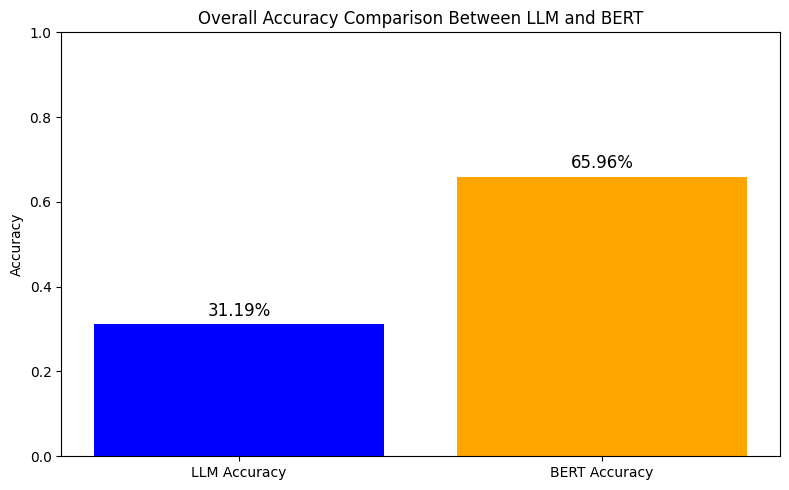

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_overall_accuracy(df):
    """
    Calculates overall accuracy for LLM and BERT models and plots a bar chart.

    Args:
        df (pd.DataFrame): A DataFrame with columns 'total_words', 'llm_successes', and 'bert_successes'.

    Returns:
        None: Displays a bar plot of overall accuracies.
    """
    # Calculate total words and successes
    total_words = df['total_words'].sum()
    total_llm_successes = df['llm_successes'].sum()
    total_bert_successes = df['bert_successes'].sum()

    # Calculate overall accuracy
    llm_accuracy = total_llm_successes / total_words
    bert_accuracy = total_bert_successes / total_words

    # Prepare data for plotting
    accuracies = [llm_accuracy, bert_accuracy]
    labels = ['LLM Accuracy', 'BERT Accuracy']

    # Plot the bar chart
    plt.figure(figsize=(8, 5))
    plt.bar(labels, accuracies, color=['blue', 'orange'])
    
    # Add labels and title
    plt.ylabel('Accuracy')
    plt.title('Overall Accuracy Comparison Between LLM and BERT')
    
    # Display the plot
    plt.ylim(0, 1)  # Ensure y-axis is between 0 and 1 for accuracy
    for i, acc in enumerate(accuracies):
        plt.text(i, acc + 0.02, f"{acc:.2%}", ha='center', fontsize=12)  # Add percentage labels above bars
    
    plt.tight_layout()
    plt.show()

# Call the function to plot overall accuracy
plot_overall_accuracy(df)
